In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.ticker import NullLocator, LinearLocator, MultipleLocator, IndexLocator, FixedLocator, LogLocator, MaxNLocator
from matplotlib.ticker import NullFormatter, FormatStrFormatter, FuncFormatter, ScalarFormatter, FixedFormatter

# 1997 - 2006, 2009 - 2023 погода Рязань

# data
данные обновлены 29.11.2023
- t  - температура
- p  - давление
- cloud - облачность
- precip - осадки/гроза
- wdir - направление ветра
- ws - скорость ветра 
<br> метка **d** в конце названия столбца указывает что данные **дневные**
<br> метка **n** в конце названия столбца указывает что данные **ночные**

In [2]:
data = pd.read_csv('data.csv', index_col='id')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8912 entries, 0 to 8911
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   year     8912 non-null   int64  
 1   month    8912 non-null   int64  
 2   day      8912 non-null   int64  
 3   td       8897 non-null   float64
 4   pd       8897 non-null   float64
 5   cloudd   8897 non-null   object 
 6   precipd  1342 non-null   object 
 7   wdird    8897 non-null   object 
 8   wsd      8897 non-null   float64
 9   tn       8884 non-null   float64
 10  pn       8884 non-null   float64
 11  cloudn   8884 non-null   object 
 12  precipn  1189 non-null   object 
 13  wdirn    8884 non-null   object 
 14  wsn      8884 non-null   float64
dtypes: float64(6), int64(3), object(6)
memory usage: 1.1+ MB


# 7. Общее

### 7.1 распределение силы ветра по направлениям

In [13]:
# массив с количеством сил ветра по направлениям
wsd = data[data.wsd>0].pivot_table(index='wsd', 
                                   columns='wdird', 
                                   values='day', 
                                   aggfunc='count')\
                      .fillna(0).astype('int64')

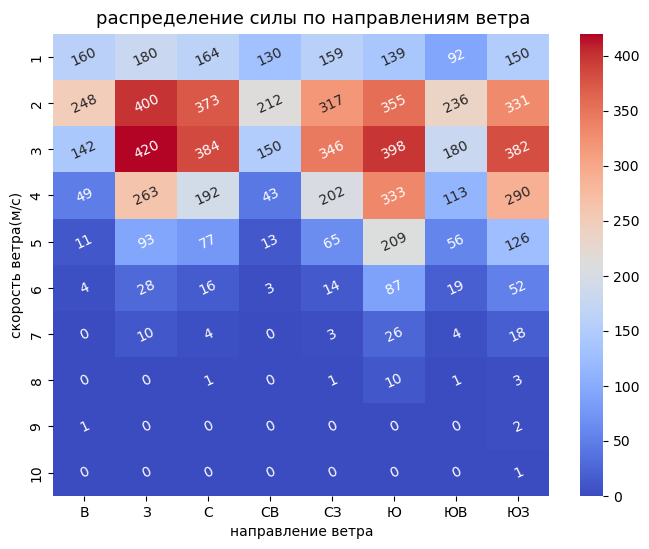

In [12]:
fig71 = plt.figure(figsize=(8, 6))
fig71.suptitle('распределение силы по направлениям ветра',x=0.45,y=0.92, fontsize=13)
ax_wsd = fig71.add_subplot()
ax_wsd = sns.heatmap(wsd, cmap='coolwarm', annot=wsd, annot_kws={'size': 10, 'rotation': 25}, fmt='.0f')
ax_wsd.set(xlabel="направление ветра", ylabel="скорость ветра(м/с)");